In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [15]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [23]:
# Create a copy of 'Age' column to work with
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

# Now fill missing values
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(
    X_train['Age_imputed'].isnull().sum(), replace=True).values

X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(
    X_test['Age_imputed'].isnull().sum(), replace=True).values


In [24]:
X_train['Age_imputed']

331    45.5
733    23.0
382    32.0
704    26.0
813     6.0
       ... 
106    21.0
270    34.0
860    41.0
435    14.0
102    21.0
Name: Age_imputed, Length: 712, dtype: float64

In [25]:
X_train

,Age,Fare,Age_imputer,Age_imputed
331,45.5,28.5000,45.5,45.5
733,23.0,13.0000,23.0,23.0
382,32.0,7.9250,32.0,32.0
704,26.0,7.8542,26.0,26.0
813,6.0,31.2750,6.0,6.0
...,...,...,...,...
106,21.0,7.6500,21.0,21.0
270,NaN,31.0000,NaN,34.0
860,41.0,14.1083,41.0,41.0
435,14.0,120.0000,14.0,14.0


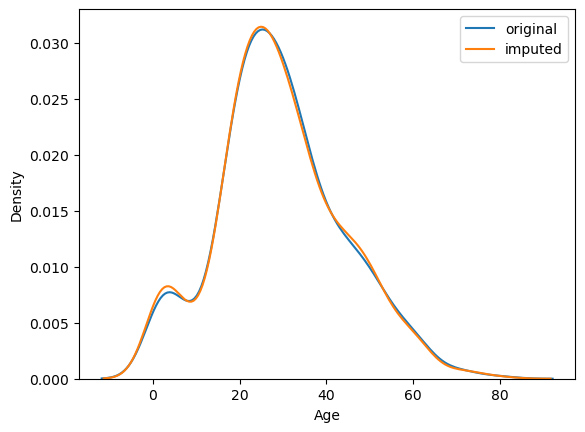

In [33]:
sns.kdeplot(X_train['Age'],label='original')
sns.kdeplot(X_train['Age_imputed'],label='imputed')
plt.legend()
plt.show()

In [34]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  210.2517072477438
Variance after random imputation:  212.28809630999194


In [35]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,62.745215
Age,71.580633,210.251707,210.251707
Age_imputed,62.745215,210.251707,212.288096


<Axes: >

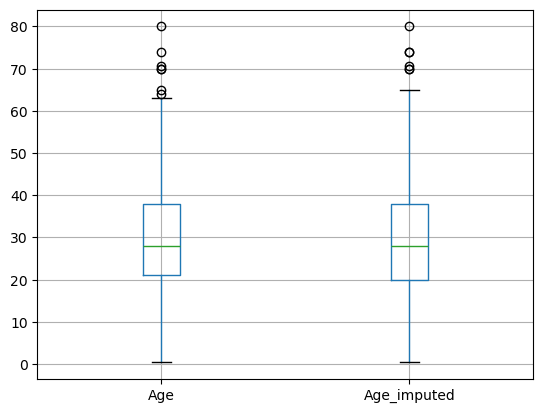

In [37]:
X_train[['Age','Age_imputed']].boxplot()